In [60]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

import pickle
import json

# Step 1: Problem Statement

# Step 2: Data Gathering

In [2]:
df = pd.read_csv("bank-additional-full.csv",sep=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,41178,41179,41180,41181,41182,41183,41184,41185,41186,41187
age,56,57,37,40,56,45,59,41,24,25,...,62,64,36,37,29,73,46,56,44,74
job,housemaid,services,services,admin.,services,services,admin.,blue-collar,technician,services,...,retired,retired,admin.,admin.,unemployed,retired,blue-collar,retired,technician,retired
marital,married,married,married,married,married,married,married,married,single,single,...,married,divorced,married,married,single,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school,basic.9y,professional.course,unknown,professional.course,high.school,...,university.degree,professional.course,university.degree,university.degree,basic.4y,professional.course,professional.course,university.degree,professional.course,professional.course
default,no,unknown,no,no,no,unknown,no,unknown,no,no,...,no,no,no,no,no,no,no,no,no,no
housing,no,no,yes,no,no,no,no,no,yes,yes,...,no,yes,no,yes,yes,yes,no,yes,no,yes
loan,no,no,no,no,yes,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
contact,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,...,cellular,cellular,cellular,cellular,cellular,cellular,cellular,cellular,cellular,cellular
month,may,may,may,may,may,may,may,may,may,may,...,nov,nov,nov,nov,nov,nov,nov,nov,nov,nov
day_of_week,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon,...,thu,fri,fri,fri,fri,fri,fri,fri,fri,fri


# Step 3: EDA [Exploratory Data Analysis]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# check for missing values
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df["age"].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

In [7]:
print(df["duration"].unique())
for index,i in enumerate(df["duration"].unique()):
    if i <= 0:
        print(f"Index position {index} and value {i}")

[ 261  149  226 ... 1246 1556 1868]
Index position 939 and value 0


In [8]:
df["campaign"].unique()      

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43], dtype=int64)

In [9]:
df["pdays"].unique()  

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [10]:
df["previous"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [11]:
df["emp.var.rate"].unique()

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

In [12]:
df["cons.price.idx"].unique()

array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649,
       92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199,
       94.601, 94.767])

In [13]:
df["cons.conf.idx"].unique()

array([-36.4, -41.8, -42.7, -36.1, -40.4, -42. , -45.9, -50. , -47.1,
       -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33. , -34.8,
       -34.6, -40. , -39.8, -40.3, -38.3, -37.5, -49.5, -50.8])

In [14]:
df["euribor3m"].unique()

array([4.857, 4.856, 4.855, 4.859, 4.86 , 4.858, 4.864, 4.865, 4.866,
       4.967, 4.961, 4.959, 4.958, 4.96 , 4.962, 4.955, 4.947, 4.956,
       4.966, 4.963, 4.957, 4.968, 4.97 , 4.965, 4.964, 5.045, 5.   ,
       4.936, 4.921, 4.918, 4.912, 4.827, 4.794, 4.76 , 4.733, 4.7  ,
       4.663, 4.592, 4.474, 4.406, 4.343, 4.286, 4.245, 4.223, 4.191,
       4.153, 4.12 , 4.076, 4.021, 3.901, 3.879, 3.853, 3.816, 3.743,
       3.669, 3.563, 3.488, 3.428, 3.329, 3.282, 3.053, 1.811, 1.799,
       1.778, 1.757, 1.726, 1.703, 1.687, 1.663, 1.65 , 1.64 , 1.629,
       1.614, 1.602, 1.584, 1.574, 1.56 , 1.556, 1.548, 1.538, 1.531,
       1.52 , 1.51 , 1.498, 1.483, 1.479, 1.466, 1.453, 1.445, 1.435,
       1.423, 1.415, 1.41 , 1.405, 1.406, 1.4  , 1.392, 1.384, 1.372,
       1.365, 1.354, 1.344, 1.334, 1.327, 1.313, 1.299, 1.291, 1.281,
       1.266, 1.25 , 1.244, 1.259, 1.264, 1.27 , 1.262, 1.26 , 1.268,
       1.286, 1.252, 1.235, 1.224, 1.215, 1.206, 1.099, 1.085, 1.072,
       1.059, 1.048,

In [15]:
df["nr.employed"].unique()

array([5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5,
       5008.7, 4991.6, 4963.6])

In [16]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [17]:
for i in df.columns:
    print("Column Name:",i)
    print("Unique Values:\n",df[i].unique())
    print("Count of unique values:\n",df[i].value_counts())
    print()

Column Name: age
Unique Values:
 [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Count of unique values:
 31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

Column Name: job
Unique Values:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Count of unique values:
 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

Column Name: marital
Unique Values:


In [18]:
# Outliers 

In [19]:
# Assumptions 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [21]:
##Labelling:

In [22]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,41178,41179,41180,41181,41182,41183,41184,41185,41186,41187
age,56,57,37,40,56,45,59,41,24,25,...,62,64,36,37,29,73,46,56,44,74
job,housemaid,services,services,admin.,services,services,admin.,blue-collar,technician,services,...,retired,retired,admin.,admin.,unemployed,retired,blue-collar,retired,technician,retired
marital,married,married,married,married,married,married,married,married,single,single,...,married,divorced,married,married,single,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school,basic.9y,professional.course,unknown,professional.course,high.school,...,university.degree,professional.course,university.degree,university.degree,basic.4y,professional.course,professional.course,university.degree,professional.course,professional.course
default,no,unknown,no,no,no,unknown,no,unknown,no,no,...,no,no,no,no,no,no,no,no,no,no
housing,no,no,yes,no,no,no,no,no,yes,yes,...,no,yes,no,yes,yes,yes,no,yes,no,yes
loan,no,no,no,no,yes,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
contact,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,...,cellular,cellular,cellular,cellular,cellular,cellular,cellular,cellular,cellular,cellular
month,may,may,may,may,may,may,may,may,may,may,...,nov,nov,nov,nov,nov,nov,nov,nov,nov,nov
day_of_week,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon,...,thu,fri,fri,fri,fri,fri,fri,fri,fri,fri


In [23]:
colnames_obj = df.select_dtypes(include="object").columns
print(colnames_obj)

##convert to dict all:

for i in colnames_obj:
    print("Col Name:",i)
    mydict = df[i].value_counts().to_dict()
    print(mydict)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
Col Name: job
{'admin.': 10422, 'blue-collar': 9254, 'technician': 6743, 'services': 3969, 'management': 2924, 'retired': 1720, 'entrepreneur': 1456, 'self-employed': 1421, 'housemaid': 1060, 'unemployed': 1014, 'student': 875, 'unknown': 330}
Col Name: marital
{'married': 24928, 'single': 11568, 'divorced': 4612, 'unknown': 80}
Col Name: education
{'university.degree': 12168, 'high.school': 9515, 'basic.9y': 6045, 'professional.course': 5243, 'basic.4y': 4176, 'basic.6y': 2292, 'unknown': 1731, 'illiterate': 18}
Col Name: default
{'no': 32588, 'unknown': 8597, 'yes': 3}
Col Name: housing
{'yes': 21576, 'no': 18622, 'unknown': 990}
Col Name: loan
{'no': 33950, 'yes': 6248, 'unknown': 990}
Col Name: contact
{'cellular': 26144, 'telephone': 15044}
Col Name: month
{'may': 13769, 'jul': 7174, 'aug': 6178, 'jun': 5318, 'nov': 4101, 'apr': 2632

In [24]:
## OHE:
mylist = ["job","marital","contact","month","day_of_week"]


# df = pd.get_dummies(df, columns=['body-style'])

for i in mylist:
    df = pd.get_dummies(df, columns=[i])

In [25]:
##labelling:
# Default: has credit in default?  

label_list = ["education","default"]

education_dict = {'university.degree': 7, 
                  'high.school': 5, 
                  'basic.9y': 4, 
                  'professional.course': 6, 
                  'basic.4y': 2, 
                  'basic.6y': 3, 
                  'unknown': 1, 
                  'illiterate': 0}

df["education"].replace(education_dict, inplace=True)


default_dict = {'no': 3, 'unknown': 2, 'yes': 1}
df["default"].replace(default_dict, inplace=True)

housing_dict={'yes': 3, 'no': 1, 'unknown': 2}
df["housing"].replace(housing_dict, inplace=True)

loan_dict={'yes': 3, 'no': 1, 'unknown': 2}
df["loan"].replace(loan_dict, inplace=True)


poutcome_dict= {'nonexistent': 2, 'failure': 3, 'success': 1}
df["poutcome"].replace(poutcome_dict, inplace=True)

y_dict={'no': 0, 'yes': 1}
df["y"].replace(y_dict, inplace=True)

In [26]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,41178,41179,41180,41181,41182,41183,41184,41185,41186,41187
age,56.000,57.000,37.000,40.000,56.000,45.000,59.000,41.000,24.000,25.000,...,62.000,64.000,36.000,37.000,29.000,73.000,46.000,56.000,44.000,74.000
education,2.000,5.000,5.000,3.000,5.000,4.000,6.000,1.000,6.000,5.000,...,7.000,6.000,7.000,7.000,2.000,6.000,6.000,7.000,6.000,6.000
default,3.000,2.000,3.000,3.000,3.000,2.000,3.000,2.000,3.000,3.000,...,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000
housing,1.000,1.000,3.000,1.000,1.000,1.000,1.000,1.000,3.000,3.000,...,1.000,3.000,1.000,3.000,3.000,3.000,1.000,3.000,1.000,3.000
loan,1.000,1.000,1.000,1.000,3.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
duration,261.000,149.000,226.000,151.000,307.000,198.000,139.000,217.000,380.000,50.000,...,483.000,151.000,254.000,281.000,112.000,334.000,383.000,189.000,442.000,239.000
campaign,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,2.000,3.000,2.000,1.000,1.000,1.000,1.000,2.000,1.000,3.000
pdays,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,...,6.000,999.000,999.000,999.000,9.000,999.000,999.000,999.000,999.000,999.000
previous,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,3.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
poutcome,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,...,1.000,2.000,2.000,2.000,1.000,2.000,2.000,2.000,2.000,3.000


In [27]:
df.corr() ##waste corr

,age,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
age,1.000000,-0.184463,-0.164965,-0.001603,-0.007368,-0.000866,0.004594,-0.034369,0.024365,-0.019750,...,0.008390,-0.067523,0.030045,0.053008,0.040889,0.007148,0.019027,-0.021356,0.019137,-0.023671
education,-0.184463,1.000000,0.225031,0.021101,0.011141,-0.016129,-0.001560,-0.025417,0.020942,-0.006642,...,0.025558,-0.104590,0.068920,0.012541,0.015873,-0.005831,0.010649,0.009991,-0.011710,-0.003609
default,-0.164965,0.225031,1.000000,0.015815,0.003782,0.011794,-0.032825,-0.080062,0.102416,0.023417,...,0.051178,-0.066952,0.085652,0.060199,0.054710,-0.003981,-0.007028,0.005004,-0.003641,0.009592
housing,-0.001603,0.021101,0.015815,1.000000,0.044296,-0.007658,-0.011010,-0.010551,0.021314,0.011783,...,0.013108,-0.022383,0.032332,0.003108,0.006986,-0.015536,0.011706,0.011844,-0.010433,0.001710
loan,-0.007368,0.011141,0.003782,0.044296,1.000000,-0.000916,0.005166,0.000345,-0.001327,0.001511,...,-0.004334,0.001684,-0.006138,-0.008996,-0.001905,0.007376,0.005742,-0.002671,-0.008350,-0.002046
duration,-0.000866,-0.016129,0.011794,-0.007658,-0.000916,1.000000,-0.071699,-0.047577,0.020640,-0.033360,...,-0.005516,0.008054,-0.015941,0.015454,0.018011,-0.010343,-0.023068,0.014666,0.004140,0.014537
campaign,0.004594,-0.001560,-0.032825,-0.011010,0.005166,-0.071699,1.000000,0.052584,-0.079141,-0.032586,...,-0.015244,-0.032704,-0.079028,-0.049126,-0.033953,0.026641,0.014405,0.005141,-0.025125,-0.021088
pdays,-0.034369,-0.025417,-0.080062,-0.010551,0.000345,-0.047577,0.052584,1.000000,-0.587514,0.475619,...,-0.078769,0.070690,-0.016946,-0.128677,-0.154629,0.013782,0.001031,-0.008186,-0.007300,0.001021
previous,0.024365,0.020942,0.102416,0.021314,-0.001327,0.020640,-0.079141,-0.587514,1.000000,0.313110,...,0.072733,-0.012534,0.081050,0.127754,0.157651,0.004404,-0.002012,0.001512,0.000090,-0.003929
poutcome,-0.019750,-0.006642,0.023417,0.011783,0.001511,-0.033360,-0.032586,0.475619,0.313110,1.000000,...,-0.012381,0.083190,0.086552,-0.009298,-0.029118,0.023005,0.000145,-0.008180,-0.008670,-0.005808


In [28]:
##only for corr with actual datasets
df1 = pd.read_csv("bank-additional-full.csv",sep=";")
df1.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


Column Name: age
AxesSubplot(0.125,0.125;0.775x0.755)


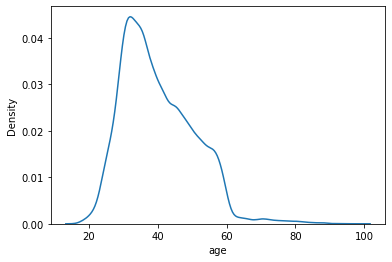


Column Name: duration
AxesSubplot(0.125,0.125;0.775x0.755)


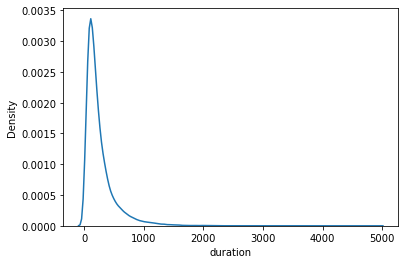


Column Name: campaign
AxesSubplot(0.125,0.125;0.775x0.755)


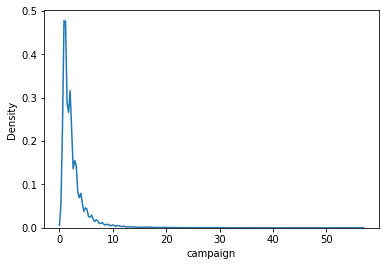


Column Name: pdays
AxesSubplot(0.125,0.125;0.775x0.755)


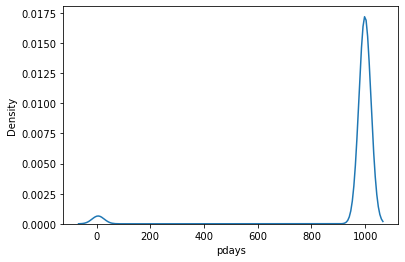


Column Name: previous
AxesSubplot(0.125,0.125;0.775x0.755)


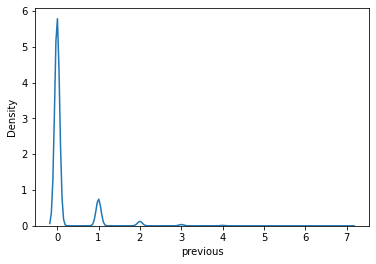


Column Name: emp.var.rate
AxesSubplot(0.125,0.125;0.775x0.755)


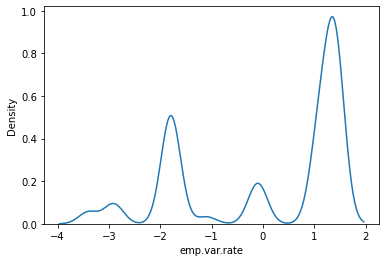


Column Name: cons.price.idx
AxesSubplot(0.125,0.125;0.775x0.755)


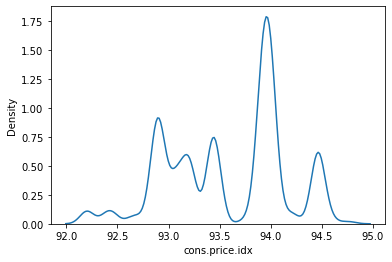


Column Name: cons.conf.idx
AxesSubplot(0.125,0.125;0.775x0.755)


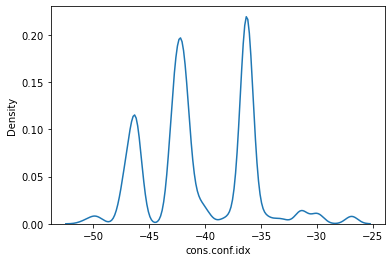


Column Name: euribor3m
AxesSubplot(0.125,0.125;0.775x0.755)


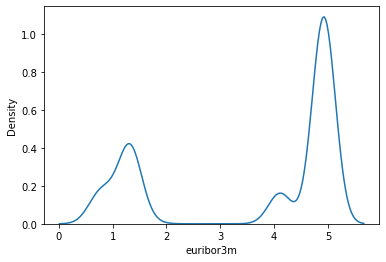


Column Name: nr.employed
AxesSubplot(0.125,0.125;0.775x0.755)


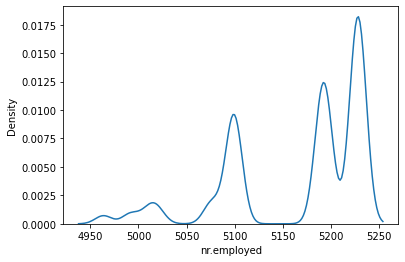

In [29]:
## kdeplots for int and float types:

cols1 = df1.select_dtypes(include=["int","float"]).columns
cols1
for i in cols1:
    print("Column Name:",i)
    print(sns.kdeplot(x = df[i]))
    plt.show()
    print()

# Step 6. Model Training

In [30]:
x = df.drop('y', axis=1)
y = df['y']

x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=9)

In [47]:
x_train.shape,y_train.shape, x_test.shape, y_test.shape

((28831, 48), (28831,), (12357, 48), (12357,))

In [32]:
#model object

logistic_model = LogisticRegression()

In [33]:
#fitting

logistic_model.fit(x_train,y_train)

C:\Users\nisha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
##prediction

y_pred_logistic = logistic_model.predict(x_test)
y_pred_logistic.shape

(12357,)

In [35]:
print("Accuracy of logistic_model",accuracy_score(y_test,y_pred_logistic))


Accuracy of logistic_model 0.9087157076960427


In [40]:
# Pickle file

with open('model.pkl','wb') as file:
    pickle.dump(logistic_model,file)

In [58]:
df = pd.read_csv("bank-additional-full.csv",sep=";")
df.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [46]:
len(df.columns)

21

In [57]:
df1 = df.transpose()
df1[[0]]

,0
age,56
job,housemaid
marital,married
education,basic.4y
default,no
housing,no
loan,no
contact,telephone
month,may
day_of_week,mon


In [61]:
d1 = { "columns": ['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed'],
      
    "result_values":{'no': 0, 'yes': 1}
    
}
with open("asset.json","w") as file:
    json.dump(d1,file)